<a href="https://colab.research.google.com/github/Chayti/Forecasting-of-Covid-19-Trends-in-Bangladesh-Using-Machine-Learning-Techniques/blob/main/Covid_ARIMA_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tensorflow as tf
# tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# To install the library 
!pip install pmdarima 


     |████████████████████████████████| 1.5 MB 4.3 MB/s 
     |████████████████████████████████| 9.5 MB 36.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#Pyramid Auto-ARIMA
#The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal parameters for an 
#ARIMA model and returns a fitted ARIMA model.

In [ ]:
# Import the library 
from pmdarima import auto_arima 

In [ ]:

#ARIMA and Seasonal ARIMA
#Autoregressive Integrated Moving Averages

#The general process for ARIMA models is the following:

 #   Visualize the Time Series Data
 #   Make the time series data stationary
 #   Plot the Correlation and AutoCorrelation Charts
 #   Construct the ARIMA Model or Seasonal ARIMA based on the data
 #   Use the model to make predictions


In [ ]:
import os
import sklearn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel("Covid-19 dataset for Bangladesh.xlsx")

In [ ]:
df.head()

,Date,Testing sample per day,Detected per day,Total detected,Recovery per day,Death per day,Total Death
0,2020-03-08,4,3,3,0,0,0
1,2020-03-09,5,0,3,0,0,0
2,2020-03-10,127,0,3,0,0,0
3,2020-03-11,10,0,3,0,0,0
4,2020-03-12,21,0,3,0,0,0


In [ ]:
df.tail()

,Date,Testing sample per day,Detected per day,Total detected,Recovery per day,Death per day,Total Death
506,2021-07-27,52478,14925,1194752,12439,258,19779
507,2021-07-28,53877,16230,1210982,13470,237,20016
508,2021-07-29,52282,15271,1226253,14336,239,20255
509,2021-07-30,45044,13862,1240115,13975,212,20467
510,2021-07-31,30980,9369,1249484,14017,218,20685


In [ ]:
df.isna().sum()

Date                      0
Testing sample per day    0
Detected per day          0
Total detected            0
Recovery per day          3
Death per day             0
Total Death               0
dtype: int64

In [ ]:
df['Recovery per day'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
506    False
507    False
508    False
509    False
510    False
Name: Recovery per day, Length: 511, dtype: bool

In [ ]:
missin_idx=df[df['Recovery per day'].isnull()].index.tolist()

In [ ]:
missin_idx

[29, 56, 99]

In [ ]:
for midx in missin_idx:
  df['Recovery per day'][midx] = np.mean(df['Recovery per day'][midx-4:midx+4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.isna().sum()

Date                      0
Testing sample per day    0
Detected per day          0
Total detected            0
Recovery per day          0
Death per day             0
Total Death               0
dtype: int64

In [ ]:
#from pandas import to_datetime
#df['Date']= pd.to_datetime(df['Date'])
#df['Date']

In [ ]:
# df['Detected per day'] = df["Detected per day"].astype(np.int64)
df_detected = df[["Date","Detected per day"]]
df_detected.set_index('Date',inplace=True)
df_detected1 = df_detected
df_detected

,Detected per day
Date,
2020-03-08,3
2020-03-09,0
2020-03-10,0
2020-03-11,0
2020-03-12,0
...,...
2021-07-27,14925
2021-07-28,16230
2021-07-29,15271


In [ ]:
df_detected.dtypes

Detected per day    int64
dtype: object

In [ ]:
df_death = df[["Date","Death per day"]]
df_death.set_index('Date',inplace=True)
# df_death.ffill(inplace=True)
df_death1 = df_death
df_death.head()

,Death per day
Date,
2020-03-08,0
2020-03-09,0
2020-03-10,0
2020-03-11,0
2020-03-12,0


In [ ]:
df_death.dtypes

Death per day    int64
dtype: object

In [ ]:
df_recovery = df[["Date","Recovery per day"]]
df_recovery.set_index('Date',inplace=True)
# df_recovery.ffill(inplace=True)
df_recovery1 = df_recovery
df_recovery.head()

,Recovery per day
Date,
2020-03-08,0
2020-03-09,0
2020-03-10,0
2020-03-11,0
2020-03-12,0


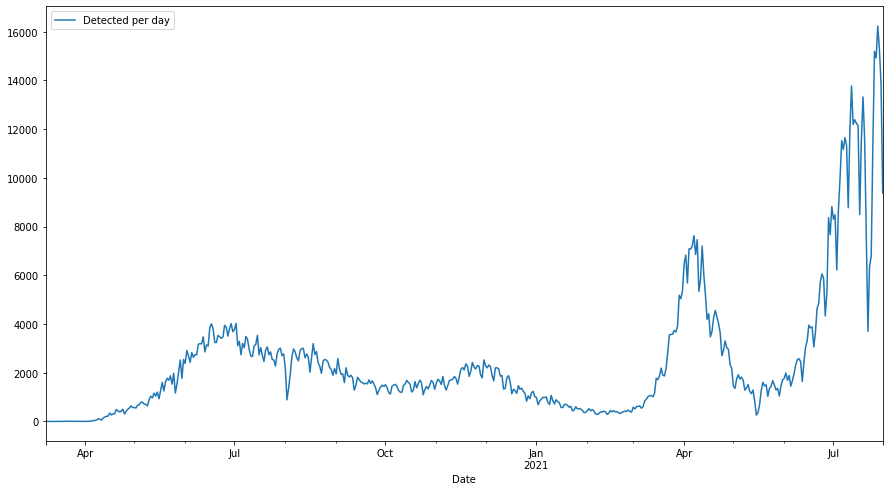

In [ ]:
#df_detected1=df_detected1.astype(np.int64)
df_detected1.plot(figsize=(15,8))

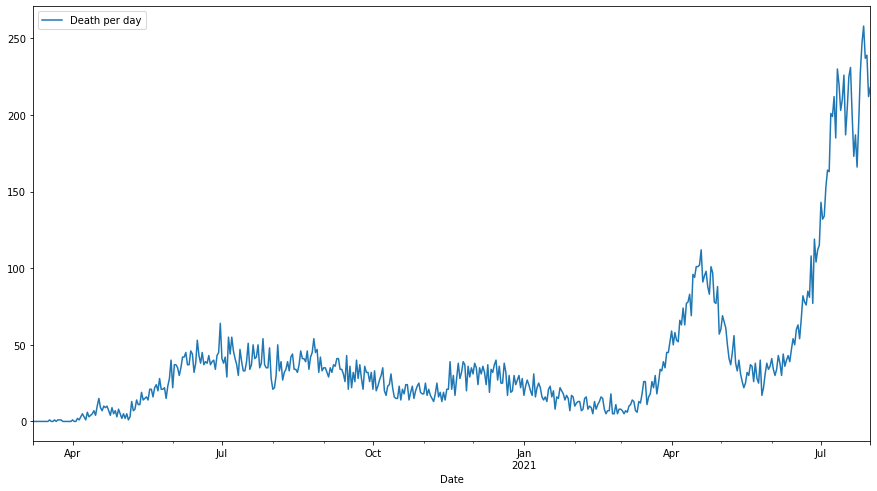

In [ ]:
df_death1.plot(figsize=(15,8))

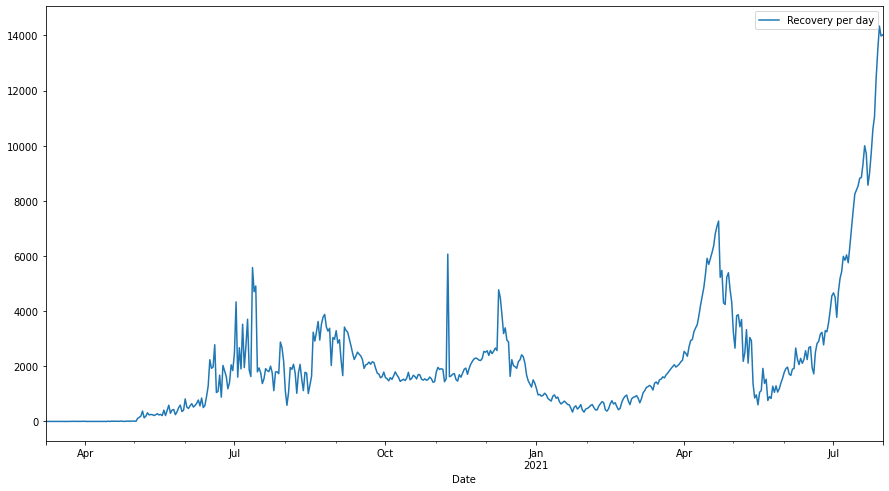

In [ ]:
df_recovery1=df_recovery1.astype(np.int64)
df_recovery1.plot(figsize=(15,8))


In [ ]:


#As mentioned previously, before we can build a model, we must ensure that the time series is stationary. There are two primary way to determine whether a given time series is stationary.

 #   Rolling Statistics: Plot the rolling mean and rolling standard deviation. 
  #  The time series is stationary if they remain constant with time 
   # (with the naked eye look to see if the lines are straight and parallel to the x-axis).
    
   # Augmented Dickey-Fuller Test: The time series is considered stationary 
    #if the p-value is low (according to the null hypothesis) and 
     #the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics



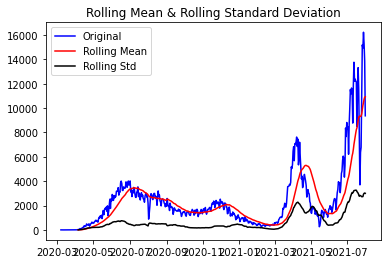

In [ ]:
rolling_mean = df_detected.rolling(window = 30).mean()
rolling_std = df_detected.rolling(window = 30).std()
plt.plot(df_detected, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

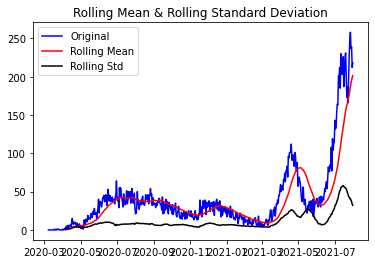

In [ ]:
rolling_mean = df_death.rolling(window = 30).mean()
rolling_std = df_death.rolling(window = 30).std()
plt.plot(df_death, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

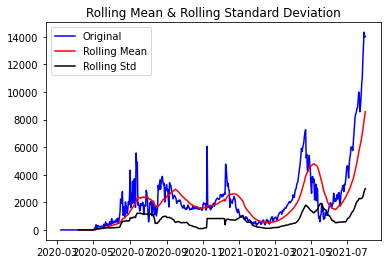

In [ ]:
rolling_mean = df_recovery.rolling(window = 30).mean()
rolling_std = df_recovery.rolling(window = 30).std()
plt.plot(df_recovery, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
#As the rolling mean and rolling standard deviation increase with time. 
#Therefore, we can conclude that the time series is not stationary.

In [ ]:
### Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

In [ ]:
#test_result_detected=adfuller(df_detected['Detected per day'])
#test_result_death=adfuller(df_death['Death per day'])
#test_result_recovery=adfuller(df_recovery['Recovery per day'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df_detected['Detected per day'])

ADF Test Statistic : -0.5060097022692288
p-value : 0.8908383982571895
#Lags Used : 16
Number of Observations Used : 494
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
adfuller_test(df_death['Death per day'])

ADF Test Statistic : 0.525575943359645
p-value : 0.9856300717955316
#Lags Used : 18
Number of Observations Used : 492
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
adfuller_test(df_recovery['Recovery per day'])

ADF Test Statistic : 0.5901839362455658
p-value : 0.9873711644084822
#Lags Used : 15
Number of Observations Used : 495
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
#trying to making stationary using log transforming

In [ ]:
#df_detected['Detected per day'] = np.log(df_detected['Detected per day'])
#droping inf value 
#df_detected = df_detected[np.isfinite(df_detected).all(1)]

#df_detected = df_detected.diff().dropna()
#df_detected.plot()

In [ ]:
#adfuller_test(df_detected['Detected per day'])

In [ ]:
#trying to make stationary using Differencing

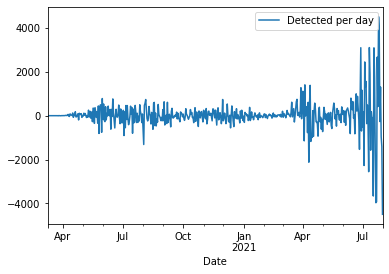

In [ ]:
df_detected = df_detected.diff().dropna()
df_detected.plot()

In [ ]:
adfuller_test(df_detected['Detected per day'])

ADF Test Statistic : -4.63964840473366
p-value : 0.00010909410989741346
#Lags Used : 15
Number of Observations Used : 494
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


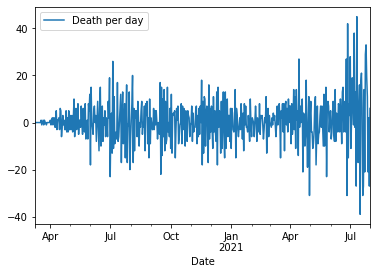

In [ ]:
df_death = df_death.diff().dropna()
df_death.plot()

In [ ]:
adfuller_test(df_death['Death per day'])

ADF Test Statistic : -4.193999370831248
p-value : 0.0006744815746150196
#Lags Used : 13
Number of Observations Used : 496
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


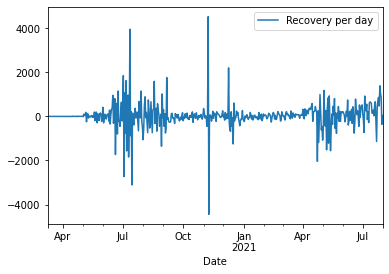

In [ ]:
df_recovery['Recovery per day']=df_recovery['Recovery per day'].astype(np.int64)
df_recovery = df_recovery.diff().dropna()
df_recovery.plot()

In [ ]:
adfuller_test(df_recovery['Recovery per day'])

ADF Test Statistic : -2.897316315611805
p-value : 0.04566096466222443
#Lags Used : 14
Number of Observations Used : 495
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
#AR model, ACF, PACF, Auto ARIMA, ARIMA, SARIMA, Error measurement on "Detected per day"

In [ ]:
#Auto Regressive Model 

In [ ]:
#from pandas.plotting import autocorrelation_plot
#autocorrelation_plot(df_detected['Detected per day'])
#plt.show()

In [ ]:
#Final Thoughts on Autocorrelation and Partial Autocorrelation

  #Identification of an AR model is often best done with the PACF.
  #For an AR model, the theoretical PACF “shuts off” past the order of the model. 
  #The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way,
  #the number of non-zero partial autocorrelations gives the order of the AR model. 
  #By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

  #Identification of an MA model is often best done with the ACF rather than the PACF.
  #For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. 
  #A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved 
  #in the model.

In [ ]:
#import statsmodels.api as sm
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(df_detected['Detected per day'],lags=40,ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(df_detected['Detected per day'],lags=40,ax=ax2)

In [ ]:
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to dataset 
stepwise_fit_detected = auto_arima(df_detected['Detected per day'], start_p = 1, start_q = 1, 
                          m = 30, max_p = 3, max_q = 3,
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit_detected.summary() 

# Best model:  ARIMA(0,0,1)(2,1,1)[30]  coz ARIMA(0,0,0)(2,1,1)[30] is high error

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=30.42 sec
 ARIMA(0,0,0)(0,1,0)[30] intercept   : AIC=7822.830, Time=0.21 sec
 ARIMA(1,0,0)(1,1,0)[30] intercept   : AIC=7756.861, Time=8.89 sec
 ARIMA(0,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=12.92 sec
 ARIMA(0,0,0)(0,1,0)[30]             : AIC=7820.836, Time=0.16 sec
 ARIMA(1,0,0)(0,1,0)[30] intercept   : AIC=7818.586, Time=0.44 sec
 ARIMA(1,0,0)(2,1,0)[30] intercept   : AIC=7720.922, Time=23.80 sec
 ARIMA(1,0,0)(2,1,1)[30] intercept   : AIC=7707.749, Time=50.15 sec
 ARIMA(1,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=21.37 sec
 ARIMA(1,0,0)(2,1,2)[30] intercept   : AIC=inf, Time=66.15 sec
 ARIMA(1,0,0)(1,1,2)[30] intercept   : AIC=inf, Time=50.97 sec
 ARIMA(0,0,0)(2,1,1)[30] intercept   : AIC=7706.318, Time=36.31 sec
 ARIMA(0,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=14.21 sec
 ARIMA(0,0,0)(2,1,0)[30] intercept   : AIC=7719.184, Time=19.37 sec
 ARIMA(0,0,0)(2,1,2)[30] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  510
Model:             SARIMAX(2, 1, [1], 30)   Log Likelihood               -3848.229
Date:                    Wed, 04 Aug 2021   AIC                           7704.459
Time:                            16:28:06   BIC                           7721.154
Sample:                                 0   HQIC                          7711.021
                                    - 510                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L30      -0.2465      0.087     -2.832      0.005      -0.417      -0.076
ar.S.L60      -0.1882      0.096     -1.962      0.050      -0.376      -0.000
ma.S.L30      -0.7105      0.092     -7.689      0.000      -0.892      -0.529
sigma2      5.101e+05    1.2e+04     42.386      0.000    4.87e+05    5.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):              5035.39
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):              11.90   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#ARIMA

In [ ]:
df_detected1['Detected per day']=df_detected1['Detected per day'].astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_detected=ARIMA(df_detected1['Detected per day'],order=(0,0,0))
model_fit_detected=model_detected.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

In [ ]:
model_fit_detected.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       Detected per day   No. Observations:                  511
Model:                     ARMA(0, 0)   Log Likelihood               -4761.783
Method:                           css   S.D. of innovations           2696.255
Date:                Thu, 05 Aug 2021   AIC                           9527.566
Time:                        18:57:06   BIC                           9536.039
Sample:                    03-08-2020   HQIC                          9530.887
                         - 07-31-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2445.1742    119.275     20.500      0.000    2211.399    2678.949
==============================================================================
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


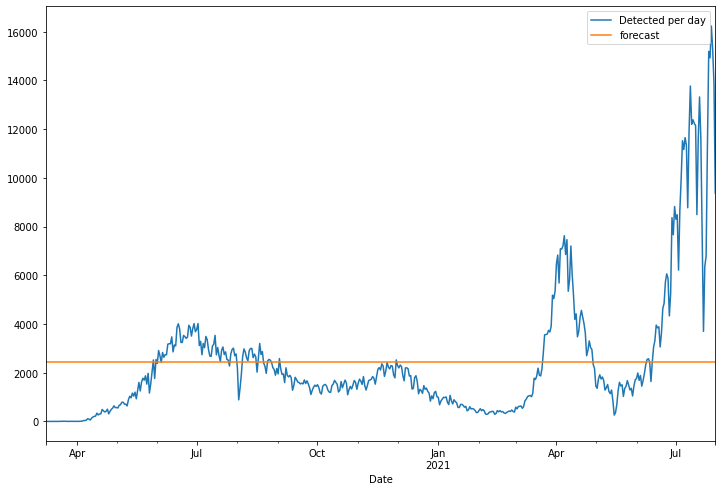

In [ ]:
df_detected1['forecast'] = model_fit_detected.predict(start=0,end=511)
df_detected1[['Detected per day','forecast']].plot(figsize=(12,8))

In [ ]:
# Load specific evaluation tools 
#from sklearn.metrics import mean_squared_error 

from sklearn import metrics
from statsmodels.tools.eval_measures import rmse 
# from sklearn.metrics import pl
  
# Calculate mean squared error (MSE)
MSE = metrics.mean_squared_error(df_detected1["Detected per day"], df_detected1["forecast"])
print('Mean Squared Error (MSE): ' + str(MSE))

# Calculate root mean squared error (RMSE)
RMSE = rmse(df_detected1["Detected per day"],df_detected1["forecast"])
print('Root Mean Squared Error (RMSE): ' + str(RMSE))

# Calculate Mean Absolute Error (MAE)
MAE = metrics.mean_absolute_error(df_detected1["Detected per day"], df_detected1["forecast"])
print('Mean Absolute Error (MAE): ' + str(MAE))

# Calculate Mean Absolute Percentage Error (MAPE)
MAPE = np.mean(np.abs(np.subtract(df_detected1["forecast"],df_detected1["Detected per day"])/ df_detected1["Detected per day"]))
print('Mean Absolute Percentage Error (MAPE): ' + str(MAPE) + ' %')

# Calculate Median Absolute Percentage Error (MDAPE)
MDAPE = np.median(np.abs(np.subtract(df_detected1["forecast"],df_detected1["Detected per day"])/ df_detected1["Detected per day"]))
print('Median Absolute Percentage Error (MDAPE): ' + str(MDAPE) + ' %')

Mean Squared Error (MSE): 7269790.402150726
Root Mean Squared Error (RMSE): 2696.254884492697
Mean Absolute Error (MAE): 1736.589297681918
Mean Absolute Percentage Error (MAPE): inf %
Median Absolute Percentage Error (MDAPE): 0.6312035812524728 %


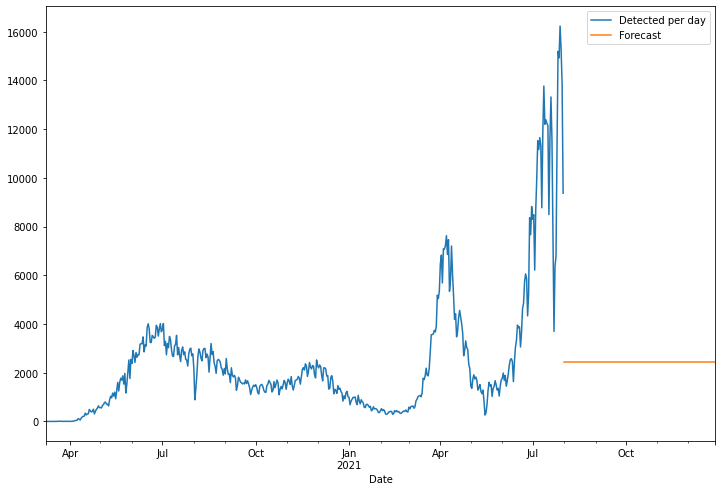

In [ ]:
# Forecast for the next 5 months using ARIMA
from pandas.tseries.offsets import DateOffset
forecast = model_fit_detected.predict(start = len(df_detected1),  
                          end = (len(df_detected1)-1) + 150).rename('Forecast') 
  
# Plot the forecast values 
df_detected1['Detected per day'].plot(figsize = (12, 8), legend = True) 
forecast.plot(legend = True) 

In [ ]:
forecast.head(30)

2021-08-01    2445.174168
2021-08-02    2445.174168
2021-08-03    2445.174168
2021-08-04    2445.174168
2021-08-05    2445.174168
2021-08-06    2445.174168
2021-08-07    2445.174168
2021-08-08    2445.174168
2021-08-09    2445.174168
2021-08-10    2445.174168
2021-08-11    2445.174168
2021-08-12    2445.174168
2021-08-13    2445.174168
2021-08-14    2445.174168
2021-08-15    2445.174168
2021-08-16    2445.174168
2021-08-17    2445.174168
2021-08-18    2445.174168
2021-08-19    2445.174168
2021-08-20    2445.174168
2021-08-21    2445.174168
2021-08-22    2445.174168
2021-08-23    2445.174168
2021-08-24    2445.174168
2021-08-25    2445.174168
2021-08-26    2445.174168
2021-08-27    2445.174168
2021-08-28    2445.174168
2021-08-29    2445.174168
2021-08-30    2445.174168
Freq: D, Name: Forecast, dtype: float64

In [ ]:
import statsmodels.api as sm
model_detected_sm=sm.tsa.statespace.SARIMAX(df_detected1['Detected per day'],order=(0, 0, 0),seasonal_order=(2,1,1,30))
results_detected_sm=model_detected_sm.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


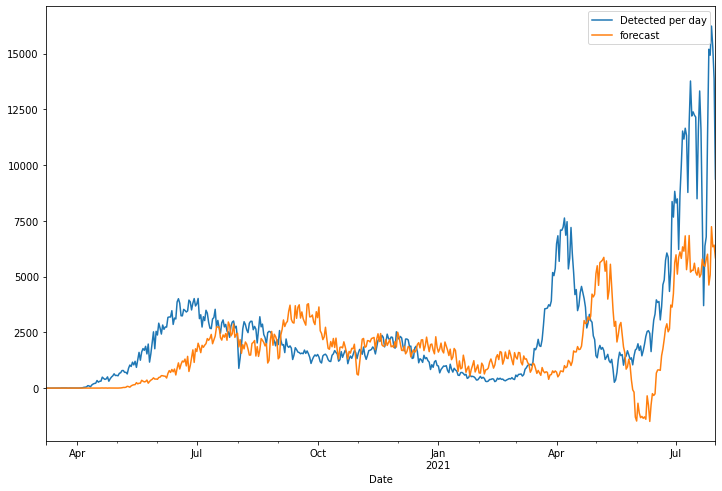

In [ ]:
df_detected1['forecast'] = results_detected_sm.predict(start=0, end=511)
df_detected1[['Detected per day','forecast']].plot(figsize=(12,8))

In [ ]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
#print(rmse(df_detected1["Detected per day"],df_detected1["forecast"]))
  
# Calculate mean squared error 
#print(mean_squared_error(df_detected1["Detected per day"], df_detected1["forecast"]))

# Calculate mean squared error (MSE)
MSE = metrics.mean_squared_error(df_detected1["Detected per day"], df_detected1["forecast"])
print('Mean Squared Error (MSE): ' + str(MSE))

# Calculate root mean squared error (RMSE)
RMSE = rmse(df_detected1["Detected per day"],df_detected1["forecast"])
print('Root Mean Squared Error (RMSE): ' + str(RMSE))

# Calculate Mean Absolute Error (MAE)
MAE = metrics.mean_absolute_error(df_detected1["Detected per day"], df_detected1["forecast"])
print('Mean Absolute Error (MAE): ' + str(MAE))

# Calculate Mean Absolute Percentage Error (MAPE)
MAPE = np.mean(np.abs(np.subtract(df_detected1["forecast"],df_detected1["Detected per day"])/ df_detected1["Detected per day"]))
print('Mean Absolute Percentage Error (MAPE): ' + str(MAPE) + ' %')

# Calculate Median Absolute Percentage Error (MDAPE)
MDAPE = np.median(np.abs(np.subtract(df_detected1["forecast"],df_detected1["Detected per day"])/ df_detected1["Detected per day"]))
print('Median Absolute Percentage Error (MDAPE): ' + str(MDAPE) + ' %')


Mean Squared Error (MSE): 5174991.927797851
Root Mean Squared Error (RMSE): 2274.860858997282
Mean Absolute Error (MAE): 1498.0366771821525
Mean Absolute Percentage Error (MAPE): inf %
Median Absolute Percentage Error (MDAPE): 0.7357061423160826 %


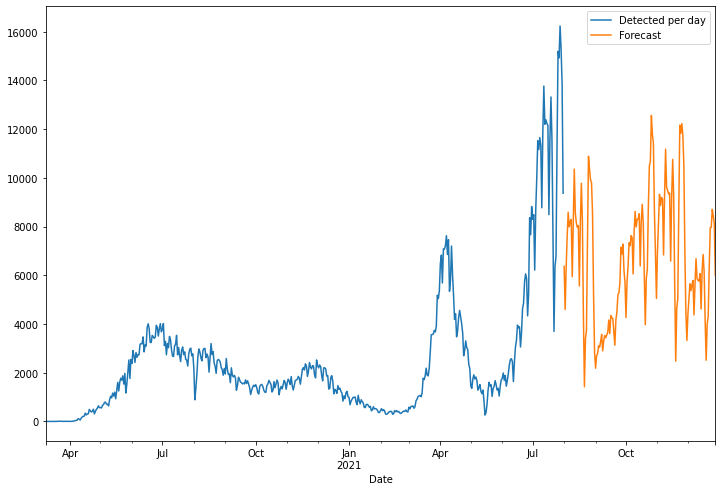

In [ ]:
# Forecast for the next 5 months using SARIMAX
from pandas.tseries.offsets import DateOffset
forecast1 = results_detected_sm.predict(start = len(df_detected1),  
                          end = (len(df_detected1)-1) + 150).rename('Forecast') 
  
# Plot the forecast values 
df_detected1['Detected per day'].plot(figsize = (12, 8), legend = True) 
forecast1.plot(legend = True) 

In [ ]:
forecast1.head(30)

2021-08-01     6363.704384
2021-08-02     4595.540299
2021-08-03     6329.847727
2021-08-04     7604.014363
2021-08-05     8587.226523
2021-08-06     7988.838521
2021-08-07     8210.830204
2021-08-08     8290.885506
2021-08-09     5942.346874
2021-08-10     8183.403629
2021-08-11    10357.587792
2021-08-12     8570.711802
2021-08-13     8156.030442
2021-08-14     7968.080761
2021-08-15     8037.965120
2021-08-16     5560.994547
2021-08-17     8176.376193
2021-08-18     9776.258686
2021-08-19     8231.999242
2021-08-20     4333.083104
2021-08-21     1423.840549
2021-08-22     3385.776364
2021-08-23     3723.032901
2021-08-24     7209.197201
2021-08-25    10886.712422
2021-08-26    10371.621839
2021-08-27     9918.012562
2021-08-28     9798.274561
2021-08-29     8525.458938
2021-08-30     5231.318134
Freq: D, Name: Forecast, dtype: float64

In [ ]:
#AR model, ACF, PACF, Auto ARIMA, ARIMA, SARIMA, Error measurement on "Death per day"

In [ ]:
#Auto Regressive Model 

In [ ]:
#import statsmodels.api as sm
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#from pandas.plotting import autocorrelation_plot
#autocorrelation_plot(df_death['Death per day'])
#plt.show()

In [ ]:
#Final Thoughts on Autocorrelation and Partial Autocorrelation

  #Identification of an AR model is often best done with the PACF.
  #For an AR model, the theoretical PACF “shuts off” past the order of the model. 
  #The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way,
  #the number of non-zero partial autocorrelations gives the order of the AR model. 
  #By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

  #Identification of an MA model is often best done with the ACF rather than the PACF.
  #For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. 
  #A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved 
  #in the model.

In [ ]:
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(df_death['Death per day'],lags=40,ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(df_death['Death per day'],lags=40,ax=ax2)

In [ ]:
#Pyramid Auto-ARIMA
#The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal parameters for an 
#ARIMA model and returns a fitted ARIMA model.

In [ ]:
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit_death = auto_arima(df_death['Death per day'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 30, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit_death.summary() 



# Performing stepwise search to minimize aic
#  ARIMA(1,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=17.12 sec
#  ARIMA(0,0,0)(0,1,0)[30] intercept   : AIC=3830.421, Time=0.31 sec
#  ARIMA(1,0,0)(1,1,0)[30] intercept   : AIC=3648.466, Time=8.56 sec
#  ARIMA(0,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=11.75 sec
#  ARIMA(0,0,0)(0,1,0)[30]             : AIC=3828.481, Time=0.17 sec
#  ARIMA(1,0,0)(0,1,0)[30] intercept   : AIC=3746.238, Time=1.72 sec
#  ARIMA(1,0,0)(2,1,0)[30] intercept   : AIC=3607.349, Time=28.35 sec
#  ARIMA(1,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=49.61 sec
#  ARIMA(1,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=13.79 sec
#  ARIMA(0,0,0)(2,1,0)[30] intercept   : AIC=3692.067, Time=21.73 sec
#  ARIMA(2,0,0)(2,1,0)[30] intercept   : AIC=3599.525, Time=30.73 sec
#  ARIMA(2,0,0)(1,1,0)[30] intercept   : AIC=3648.375, Time=11.54 sec
#  ARIMA(2,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=46.90 sec
#  ARIMA(2,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=17.70 sec
#  ARIMA(3,0,0)(2,1,0)[30] intercept   : AIC=3599.781, Time=38.83 sec
#  ARIMA(2,0,1)(2,1,0)[30] intercept   : AIC=3600.280, Time=42.68 sec
#  ARIMA(1,0,1)(2,1,0)[30] intercept   : AIC=3598.394, Time=25.38 sec
#  ARIMA(1,0,1)(1,1,0)[30] intercept   : AIC=3647.516, Time=8.85 sec
#  ARIMA(1,0,1)(2,1,1)[30] intercept   : AIC=inf, Time=59.20 sec
#  ARIMA(1,0,1)(1,1,1)[30] intercept   : AIC=inf, Time=19.26 sec
#  ARIMA(0,0,1)(2,1,0)[30] intercept   : AIC=3597.984, Time=22.87 sec
#  ARIMA(0,0,1)(1,1,0)[30] intercept   : AIC=3648.965, Time=6.19 sec
#  ARIMA(0,0,1)(2,1,1)[30] intercept   : AIC=inf, Time=35.80 sec
#  ARIMA(0,0,1)(1,1,1)[30] intercept   : AIC=inf, Time=14.13 sec
#  ARIMA(0,0,2)(2,1,0)[30] intercept   : AIC=3598.290, Time=29.49 sec
#########  ARIMA(1,0,2)(2,1,0)[30] intercept   : AIC=3596.429, Time=119.96 sec
#  ARIMA(1,0,2)(1,1,0)[30] intercept   : AIC=3647.988, Time=18.07 sec
#  ARIMA(1,0,2)(2,1,1)[30] intercept   : AIC=inf, Time=113.07 sec
#  ARIMA(1,0,2)(1,1,1)[30] intercept   : AIC=inf, Time=38.66 sec
#  ARIMA(2,0,2)(2,1,0)[30] intercept   : AIC=3602.107, Time=87.61 sec
#  ARIMA(1,0,3)(2,1,0)[30] intercept   : AIC=3601.991, Time=103.59 sec
#  ARIMA(0,0,3)(2,1,0)[30] intercept   : AIC=3600.233, Time=46.07 sec
#  ARIMA(2,0,3)(2,1,0)[30] intercept   : AIC=3600.835, Time=71.21 sec
#########  ARIMA(1,0,2)(2,1,0)[30]             : AIC=3591.956, Time=66.44 sec
#  ARIMA(1,0,2)(1,1,0)[30]             : AIC=3646.756, Time=7.17 sec
#  ARIMA(1,0,2)(2,1,1)[30]             : AIC=inf, Time=109.31 sec
#  ARIMA(1,0,2)(1,1,1)[30]             : AIC=inf, Time=37.20 sec
#  ARIMA(0,0,2)(2,1,0)[30]             : AIC=3597.264, Time=11.29 sec
#  ARIMA(1,0,1)(2,1,0)[30]             : AIC=3597.391, Time=16.45 sec
#  ARIMA(2,0,2)(2,1,0)[30]             : AIC=3601.113, Time=71.11 sec
#  ARIMA(1,0,3)(2,1,0)[30]             : AIC=3600.975, Time=57.49 sec
#########  ARIMA(0,0,1)(2,1,0)[30]             : AIC=3597.090, Time=10.32 sec
#  ARIMA(0,0,3)(2,1,0)[30]             : AIC=3599.189, Time=12.82 sec
#  ARIMA(2,0,1)(2,1,0)[30]             : AIC=3599.251, Time=20.82 sec
#  ARIMA(2,0,3)(2,1,0)[30]             : AIC=3595.497, Time=58.78 sec

# Best model:  ARIMA(1,0,2)(2,1,0)[30]          
# Total fit time: 1642.299 seconds

# SARIMAX Results Dep. Variable: 	y 	No. Observations: 	510
# Model: 	SARIMAX(1, 0, 2)x(2, 1, [], 30) 	Log Likelihood 	-1789.978
# Date: 	Thu, 05 Aug 2021 	AIC 	3591.956
# Time: 	16:48:09 	BIC 	3616.999
# Sample: 	0 	HQIC 	3601.800
# 	- 510 		
# Covariance Type: 	opg 		
# 	coef 	std err 	z 	P>|z| 	[0.025 	0.975]
# ar.L1 	0.9310 	0.026 	35.181 	0.000 	0.879 	0.983
# ma.L1 	-1.4301 	0.040 	-35.416 	0.000 	-1.509 	-1.351
# ma.L2 	0.4958 	0.030 	16.411 	0.000 	0.437 	0.555
# ar.S.L30 	-0.6573 	0.042 	-15.542 	0.000 	-0.740 	-0.574
# ar.S.L60 	-0.3795 	0.055 	-6.901 	0.000 	-0.487 	-0.272
# sigma2 	98.2211 	4.418 	22.231 	0.000 	89.562 	106.881
# Ljung-Box (Q): 	71.47 	Jarque-Bera (JB): 	354.02
# Prob(Q): 	0.00 	Prob(JB): 	0.00
# Heteroskedasticity (H): 	3.51 	Skew: 	-0.01
# Prob(H) (two-sided): 	0.00 	Kurtosis: 	7.21


# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step). 


# ARIMA(1,0,2)(2,1,0)[30] is first & 2nd best model. but it shows ValueError: The computed initial AR coefficients are not 
# stationary. You should induce stationarity, choose a different model order, or you can pass your own start_params in 
# model fitting.[ next run]. so, ARIMA(0,0,1)(2,1,0)[30] is the best.

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=12.16 sec
 ARIMA(0,0,0)(0,1,0)[30] intercept   : AIC=3830.421, Time=0.19 sec
 ARIMA(1,0,0)(1,1,0)[30] intercept   : AIC=3648.466, Time=6.24 sec
 ARIMA(0,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=6.60 sec
 ARIMA(0,0,0)(0,1,0)[30]             : AIC=3828.481, Time=0.13 sec
 ARIMA(1,0,0)(0,1,0)[30] intercept   : AIC=3746.238, Time=0.94 sec
 ARIMA(1,0,0)(2,1,0)[30] intercept   : AIC=3607.349, Time=14.66 sec
 ARIMA(1,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=24.66 sec
 ARIMA(1,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=9.24 sec
 ARIMA(0,0,0)(2,1,0)[30] intercept   : AIC=3692.067, Time=12.87 sec
 ARIMA(2,0,0)(2,1,0)[30] intercept   : AIC=3599.525, Time=17.44 sec
 ARIMA(2,0,0)(1,1,0)[30] intercept   : AIC=3648.375, Time=7.88 sec
 ARIMA(2,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=25.85 sec
 ARIMA(2,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=13.19 sec
 ARIMA(3,0,0)(2,1,0)[30] intercept   : AIC

In [ ]:
model_death=ARIMA(df_death1['Death per day'],order=(0,0,1))
model_fit_death=model_death.fit()
model_fit_death.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Death per day   No. Observations:                  511
Model:                     ARMA(0, 1)   Log Likelihood               -2433.267
Method:                       css-mle   S.D. of innovations             28.270
Date:                Thu, 05 Aug 2021   AIC                           4872.534
Time:                        18:42:38   BIC                           4885.244
Sample:                    03-08-2020   HQIC                          4877.517
                         - 07-31-2021                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  40.6258      2.258     17.991      0.000      36.200      45.052
ma.L1.Death per day     0.8072      0.018     44.225      0.000       0.771       0.843
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2388           +0.0000j            1.2388            0.5000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


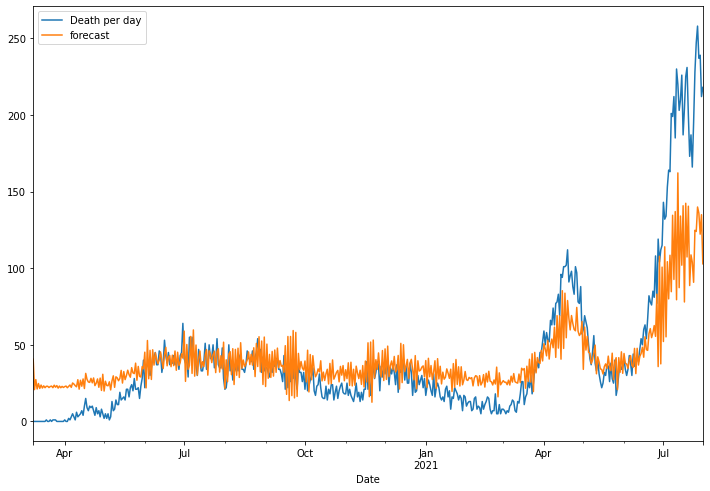

In [ ]:
df_death1['forecast'] = model_fit_death.predict(start=0,end=511)
df_death1[['Death per day','forecast']].plot(figsize=(12,8))

In [ ]:
# Calculate root mean squared error 
#print(rmse(df_death1["Death per day"],df_death1["forecast"]))

# Calculate mean squared error (MSE)
MSE = metrics.mean_squared_error(df_death1["Death per day"],df_death1["forecast"])
print('Mean Squared Error (MSE): ' + str(MSE))

# Calculate root mean squared error (RMSE)
RMSE = rmse(df_death1["Death per day"],df_death1["forecast"])
print('Root Mean Squared Error (RMSE): ' + str(RMSE))

# Calculate Mean Absolute Error (MAE)
MAE = metrics.mean_absolute_error(df_death1["Death per day"],df_death1["forecast"])
print('Mean Absolute Error (MAE): ' + str(MAE))

# Calculate Mean Absolute Percentage Error (MAPE)
MAPE = np.mean(np.abs(np.subtract(df_death1["Death per day"],df_death1["forecast"])/df_death1["Death per day"]))
print('Mean Absolute Percentage Error (MAPE): ' + str(MAPE) + ' %')

# Calculate Median Absolute Percentage Error (MDAPE)
MDAPE = np.median(np.abs(np.subtract(df_death1["Death per day"],df_death1["forecast"])/df_death1["Death per day"]))
print('Median Absolute Percentage Error (MDAPE): ' + str(MDAPE) + ' %')

Mean Squared Error (MSE): 801.0104698957007
Root Mean Squared Error (RMSE): 28.30212836335283
Mean Absolute Error (MAE): 18.053549513537796
Mean Absolute Percentage Error (MAPE): inf %
Median Absolute Percentage Error (MDAPE): 0.3740913632957232 %


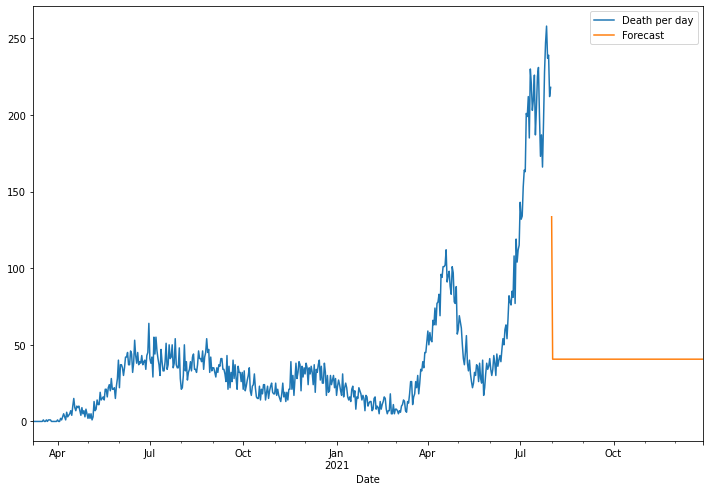

In [ ]:
forecast = model_fit_death.predict(start = len(df_death1),  
                          end = (len(df_death1)-1) + 150).rename('Forecast') 
  
# Plot the forecast values 
df_death1['Death per day'].plot(figsize = (12, 8), legend = True) 
forecast.plot(legend = True) 

In [ ]:
forecast.head(30)

2021-08-01    133.569633
2021-08-02     40.625843
2021-08-03     40.625843
2021-08-04     40.625843
2021-08-05     40.625843
2021-08-06     40.625843
2021-08-07     40.625843
2021-08-08     40.625843
2021-08-09     40.625843
2021-08-10     40.625843
2021-08-11     40.625843
2021-08-12     40.625843
2021-08-13     40.625843
2021-08-14     40.625843
2021-08-15     40.625843
2021-08-16     40.625843
2021-08-17     40.625843
2021-08-18     40.625843
2021-08-19     40.625843
2021-08-20     40.625843
2021-08-21     40.625843
2021-08-22     40.625843
2021-08-23     40.625843
2021-08-24     40.625843
2021-08-25     40.625843
2021-08-26     40.625843
2021-08-27     40.625843
2021-08-28     40.625843
2021-08-29     40.625843
2021-08-30     40.625843
Freq: D, Name: Forecast, dtype: float64

In [ ]:
model_death_sm=sm.tsa.statespace.SARIMAX(df_death1['Death per day'],order=(0, 0, 1),seasonal_order=(2,1,0,30))
results_death_sm=model_death_sm.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


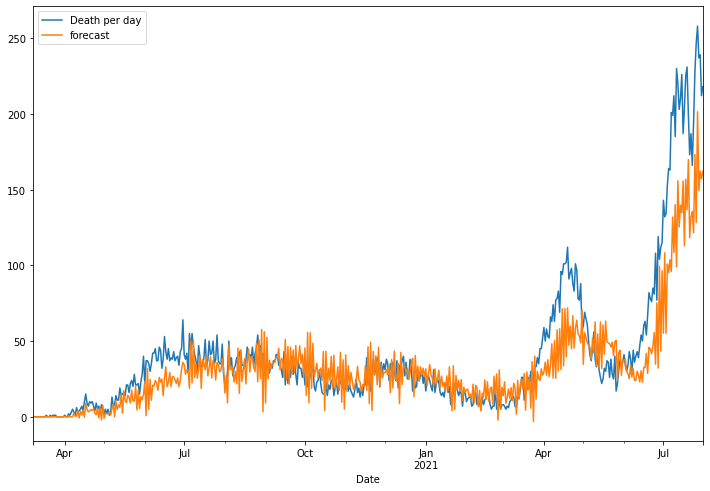

In [ ]:
df_death1['forecast'] = results_death_sm.predict(start=0, end=511)
df_death1[['Death per day','forecast']].plot(figsize=(12,8))

In [ ]:
# Calculate mean squared error (MSE)
MSE = metrics.mean_squared_error(df_death1["Death per day"],df_death1["forecast"])
print('Mean Squared Error (MSE): ' + str(MSE))

# Calculate root mean squared error (RMSE)
RMSE = rmse(df_death1["Death per day"],df_death1["forecast"])
print('Root Mean Squared Error (RMSE): ' + str(RMSE))

# Calculate Mean Absolute Error (MAE)
MAE = metrics.mean_absolute_error(df_death1["Death per day"],df_death1["forecast"])
print('Mean Absolute Error (MAE): ' + str(MAE))

# Calculate Mean Absolute Percentage Error (MAPE)
MAPE = np.mean(np.abs(np.subtract(df_death1["Death per day"],df_death1["forecast"])/df_death1["Death per day"]))
print('Mean Absolute Percentage Error (MAPE): ' + str(MAPE) + ' %')

# Calculate Median Absolute Percentage Error (MDAPE)
MDAPE = np.median(np.abs(np.subtract(df_death1["Death per day"],df_death1["forecast"])/df_death1["Death per day"]))
print('Median Absolute Percentage Error (MDAPE): ' + str(MDAPE) + ' %')

Mean Squared Error (MSE): 610.012724952866
Root Mean Squared Error (RMSE): 24.698435678254324
Mean Absolute Error (MAE): 15.541284285811223
Mean Absolute Percentage Error (MAPE): inf %
Median Absolute Percentage Error (MDAPE): nan %


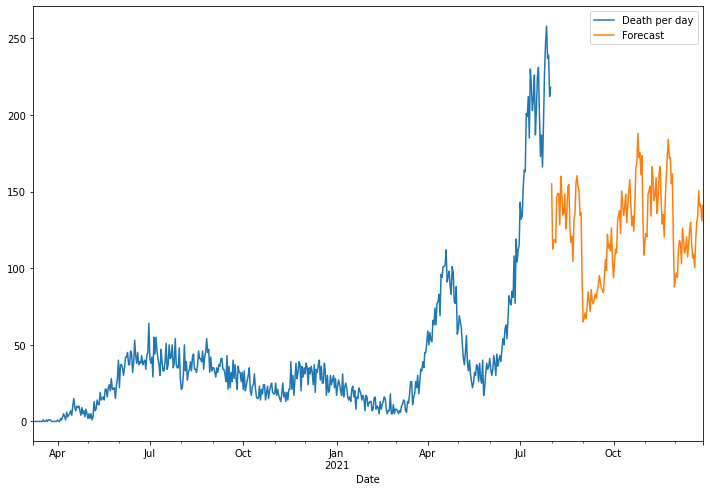

In [ ]:
# Forecast for the next 5 months using SARIMAX
forecast1 = results_death_sm.predict(start = len(df_death1),  
                          end = (len(df_death1)-1) + 150).rename('Forecast') 
  
# Plot the forecast values 
df_death1['Death per day'].plot(figsize = (12, 8), legend = True) 
forecast1.plot(legend = True) 

In [ ]:
forecast1.head(30)

2021-08-01    155.019416
2021-08-02    112.442428
2021-08-03    117.972504
2021-08-04    118.662866
2021-08-05    116.731401
2021-08-06    146.414018
2021-08-07    148.671981
2021-08-08    148.667219
2021-08-09    128.220943
2021-08-10    159.981893
2021-08-11    149.516729
2021-08-12    134.746690
2021-08-13    135.893557
2021-08-14    148.300438
2021-08-15    125.632836
2021-08-16    134.849833
2021-08-17    153.386722
2021-08-18    154.498524
2021-08-19    127.026979
2021-08-20    116.956143
2021-08-21    120.845047
2021-08-22    104.436570
2021-08-23    131.472092
2021-08-24    135.671590
2021-08-25    155.532700
2021-08-26    160.315952
2021-08-27    153.217570
2021-08-28    151.027685
2021-08-29    134.472342
2021-08-30    136.283596
Freq: D, Name: Forecast, dtype: float64

In [ ]:
#AR model, ACF, PACF, Auto ARIMA, ARIMA, SARIMA, Error measurement on "Recovery per day"

In [ ]:
#from pandas.plotting import autocorrelation_plot
#autocorrelation_plot(df_recovery['Recovery per day'])
#plt.show()

In [ ]:
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(df_recovery['Recovery per day'],lags=40,ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(df_recovery['Recovery per day'],lags=40,ax=ax2)

In [ ]:
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to dataset 
stepwise_fit_recovery = auto_arima(df_recovery['Recovery per day'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 30, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit_recovery.summary() 



# Performing stepwise search to minimize aic
#  ARIMA(1,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=35.82 sec
#  ARIMA(0,0,0)(0,1,0)[30] intercept   : AIC=7867.668, Time=0.38 sec
#  ARIMA(1,0,0)(1,1,0)[30] intercept   : AIC=7679.300, Time=15.62 sec
#  ARIMA(0,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=26.93 sec
#  ARIMA(0,0,0)(0,1,0)[30]             : AIC=7865.910, Time=0.16 sec
#  ARIMA(1,0,0)(0,1,0)[30] intercept   : AIC=7834.999, Time=1.03 sec
#  ARIMA(1,0,0)(2,1,0)[30] intercept   : AIC=7590.563, Time=35.69 sec
#  ARIMA(1,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=105.32 sec
#  ARIMA(1,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=36.44 sec
#  ARIMA(0,0,0)(2,1,0)[30] intercept   : AIC=7625.486, Time=40.97 sec
#  ARIMA(2,0,0)(2,1,0)[30] intercept   : AIC=7590.090, Time=39.05 sec
#  ARIMA(2,0,0)(1,1,0)[30] intercept   : AIC=7677.248, Time=14.94 sec
#  ARIMA(2,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=95.85 sec
#  ARIMA(2,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=39.77 sec
#  ARIMA(3,0,0)(2,1,0)[30] intercept   : AIC=7588.840, Time=56.69 sec
#  ARIMA(3,0,0)(1,1,0)[30] intercept   : AIC=7672.508, Time=18.57 sec
#  ARIMA(3,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=113.98 sec
#  ARIMA(3,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=46.07 sec
############  ARIMA(3,0,1)(2,1,0)[30] intercept   : AIC=7588.210, Time=82.42 sec
#  ARIMA(3,0,1)(1,1,0)[30] intercept   : AIC=7670.730, Time=28.67 sec
#  ARIMA(3,0,1)(2,1,1)[30] intercept   : AIC=inf, Time=121.42 sec
#  ARIMA(3,0,1)(1,1,1)[30] intercept   : AIC=inf, Time=50.31 sec
#  ARIMA(2,0,1)(2,1,0)[30] intercept   : AIC=7588.471, Time=92.44 sec
#  ARIMA(3,0,2)(2,1,0)[30] intercept   : AIC=7633.909, Time=170.13 sec
#  ARIMA(2,0,2)(2,1,0)[30] intercept   : AIC=7594.533, Time=115.66 sec
#############  ARIMA(3,0,1)(2,1,0)[30]             : AIC=7587.861, Time=43.23 sec
#  ARIMA(3,0,1)(1,1,0)[30]             : AIC=7670.193, Time=13.41 sec
#  ARIMA(3,0,1)(2,1,1)[30]             : AIC=inf, Time=117.97 sec
#  ARIMA(3,0,1)(1,1,1)[30]             : AIC=inf, Time=45.67 sec
#  ARIMA(2,0,1)(2,1,0)[30]             : AIC=7593.489, Time=62.08 sec
#########  ARIMA(3,0,0)(2,1,0)[30]             : AIC=7588.262, Time=26.94 sec
#  ARIMA(3,0,2)(2,1,0)[30]             : AIC=7633.120, Time=106.53 sec
#  ARIMA(2,0,0)(2,1,0)[30]             : AIC=7589.308, Time=22.76 sec
#  ARIMA(2,0,2)(2,1,0)[30]             : AIC=inf, Time=75.04 sec

# Best model:  ARIMA(3,0,1)(2,1,0)[30]          
# Total fit time: 1899.203 seconds

# SARIMAX Results Dep. Variable: 	y 	No. Observations: 	510
# Model: 	SARIMAX(3, 0, 1)x(2, 1, [], 30) 	Log Likelihood 	-3786.931
# Date: 	Thu, 05 Aug 2021 	AIC 	7587.861
# Time: 	22:29:10 	BIC 	7617.078
# Sample: 	0 	HQIC 	7599.345
# 	- 510 		
# Covariance Type: 	opg 		
# 	coef 	std err 	z 	P>|z| 	[0.025 	0.975]
# ar.L1 	0.1134 	0.366 	0.310 	0.757 	-0.604 	0.831
# ar.L2 	0.0211 	0.122 	0.174 	0.862 	-0.217 	0.259
# ar.L3 	-0.0696 	0.042 	-1.663 	0.096 	-0.152 	0.012
# ma.L1 	-0.4157 	0.365 	-1.140 	0.254 	-1.131 	0.299
# ar.S.L30 	-0.7632 	0.028 	-27.693 	0.000 	-0.817 	-0.709
# ar.S.L60 	-0.4119 	0.027 	-15.029 	0.000 	-0.466 	-0.358
# sigma2 	4.063e+05 	1.27e+04 	31.995 	0.000 	3.81e+05 	4.31e+05
# Ljung-Box (Q): 	73.55 	Jarque-Bera (JB): 	2071.85
# Prob(Q): 	0.00 	Prob(JB): 	0.00
# Heteroskedasticity (H): 	0.69 	Skew: 	0.67
# Prob(H) (two-sided): 	0.02 	Kurtosis: 	13.09


# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=29.37 sec
 ARIMA(0,0,0)(0,1,0)[30] intercept   : AIC=7867.668, Time=0.21 sec
 ARIMA(1,0,0)(1,1,0)[30] intercept   : AIC=7679.300, Time=10.06 sec
 ARIMA(0,0,1)(0,1,1)[30] intercept   : AIC=inf, Time=20.53 sec
 ARIMA(0,0,0)(0,1,0)[30]             : AIC=7865.910, Time=0.16 sec
 ARIMA(1,0,0)(0,1,0)[30] intercept   : AIC=7834.999, Time=0.75 sec
 ARIMA(1,0,0)(2,1,0)[30] intercept   : AIC=7590.563, Time=23.76 sec
 ARIMA(1,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=68.00 sec
 ARIMA(1,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=26.12 sec
 ARIMA(0,0,0)(2,1,0)[30] intercept   : AIC=7625.486, Time=23.42 sec
 ARIMA(2,0,0)(2,1,0)[30] intercept   : AIC=7590.090, Time=24.66 sec
 ARIMA(2,0,0)(1,1,0)[30] intercept   : AIC=7677.248, Time=11.45 sec
 ARIMA(2,0,0)(2,1,1)[30] intercept   : AIC=inf, Time=68.99 sec
 ARIMA(2,0,0)(1,1,1)[30] intercept   : AIC=inf, Time=31.08 sec
 ARIMA(2,0,1)(2,1,0)[30] intercept   :

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
from pandas.tseries.offsets import DateOffset
import statsmodels.api as sm

In [ ]:
#df_recovery=df_recovery.astype(np.int64)
model_recovery=ARIMA(df_recovery1['Recovery per day'],order=(3,0,0))
model_fit_recovery=model_recovery.fit()
model_fit_recovery.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       Recovery per day   No. Observations:                  511
Model:                     ARMA(3, 0)   Log Likelihood               -3953.047
Method:                       css-mle   S.D. of innovations            551.234
Date:                Thu, 05 Aug 2021   AIC                           7916.094
Time:                        18:49:39   BIC                           7937.276
Sample:                    03-08-2020   HQIC                          7924.398
                         - 07-31-2021                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2089.9086   9702.088      0.215      0.829   -1.69e+04    2.11e+04
ar.L1.Recovery per day     0.7170      0.044     16.299      0.000       0.631       0.803
ar.L2.Recovery per day     0.1788      0.054      3.333      0.001       0.074       0.284
ar.L3.Recovery per day     0.1013      0.044      2.284      0.022       0.014       0.188
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0021           -0.0000j            1.0021           -0.0000
AR.2           -1.3838           -2.8175j            3.1390           -0.3227
AR.3           -1.3838           +2.8175j            3.1390            0.3227
-----------------------------------------------------------------------------
"""

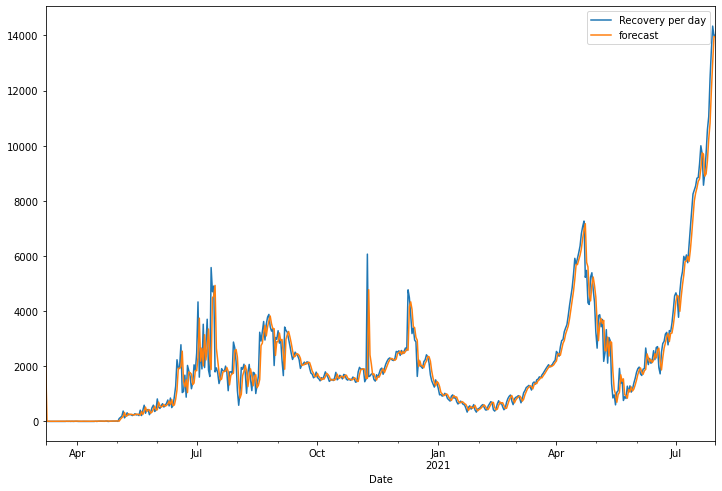

In [ ]:
df_recovery1['forecast'] = model_fit_recovery.predict(start=0,end=511)
df_recovery1[['Recovery per day','forecast']].plot(figsize=(12,8))

In [ ]:
# Load specific evaluation tools 
from sklearn import metrics
from statsmodels.tools.eval_measures import rmse 

# Calculate root mean squared error 
#print(rmse(df_recovery1["Recovery per day"],df_recovery1["forecast"]))

# Calculate mean squared error (MSE)
MSE = metrics.mean_squared_error(df_recovery1["Recovery per day"],df_recovery1["forecast"])
print('Mean Squared Error (MSE): ' + str(MSE))

# Calculate root mean squared error (RMSE)
RMSE = rmse(df_recovery1["Recovery per day"],df_recovery1["forecast"])
print('Root Mean Squared Error (RMSE): ' + str(RMSE))

# Calculate Mean Absolute Error (MAE)
MAE = metrics.mean_absolute_error(df_recovery1["Recovery per day"],df_recovery1["forecast"])
print('Mean Absolute Error (MAE): ' + str(MAE))

# Calculate Mean Absolute Percentage Error (MAPE)
MAPE = np.mean(np.abs(np.subtract(df_recovery1["Recovery per day"],df_recovery1["forecast"])/df_recovery1["Recovery per day"]))
print('Mean Absolute Percentage Error (MAPE): ' + str(MAPE) + ' %')

# Calculate Median Absolute Percentage Error (MDAPE)
MDAPE = np.median(np.abs(np.subtract(df_recovery1["Recovery per day"],df_recovery1["forecast"])/df_recovery1["Recovery per day"]))
print('Median Absolute Percentage Error (MDAPE): ' + str(MDAPE) + ' %')

Mean Squared Error (MSE): 312337.7195679309
Root Mean Squared Error (RMSE): 558.8718274952951
Mean Absolute Error (MAE): 299.63550006834936
Mean Absolute Percentage Error (MAPE): inf %
Median Absolute Percentage Error (MDAPE): 0.11903430350569426 %


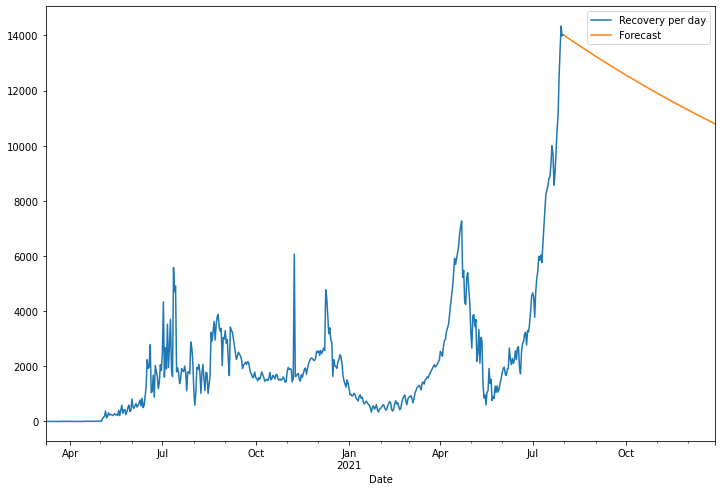

In [ ]:
# Forecast for the next 5 months using ARIMA
from pandas.tseries.offsets import DateOffset
forecast = model_fit_recovery.predict(start = len(df_recovery1),  
                          end = (len(df_recovery1)-1) + 150).rename('Forecast') 
  
# Plot the forecast values 
df_recovery1['Recovery per day'].plot(figsize = (12, 8), legend = True) 
forecast.plot(legend = True)

In [ ]:
forecast.head(30)

2021-08-01    14007.060337
2021-08-02    13970.883396
2021-08-03    13947.420243
2021-08-04    13923.121776
2021-08-05    13897.840459
2021-08-06    13872.992635
2021-08-07    13848.195304
2021-08-08    13823.412149
2021-08-09    13798.692088
2021-08-10    13774.024915
2021-08-11    13749.408380
2021-08-12    13724.844000
2021-08-13    13700.331425
2021-08-14    13675.870448
2021-08-15    13651.461014
2021-08-16    13627.103008
2021-08-17    13602.796319
2021-08-18    13578.540839
2021-08-19    13554.336461
2021-08-20    13530.183077
2021-08-21    13506.080579
2021-08-22    13482.028862
2021-08-23    13458.027816
2021-08-24    13434.077336
2021-08-25    13410.177315
2021-08-26    13386.327648
2021-08-27    13362.528226
2021-08-28    13338.778946
2021-08-29    13315.079701
2021-08-30    13291.430386
Freq: D, Name: Forecast, dtype: float64

In [ ]:
model_recovery_sm=sm.tsa.statespace.SARIMAX(df_recovery1['Recovery per day'],order=(3, 0, 0),seasonal_order=(2,1,0,30))
results_recovery_sm=model_recovery_sm.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


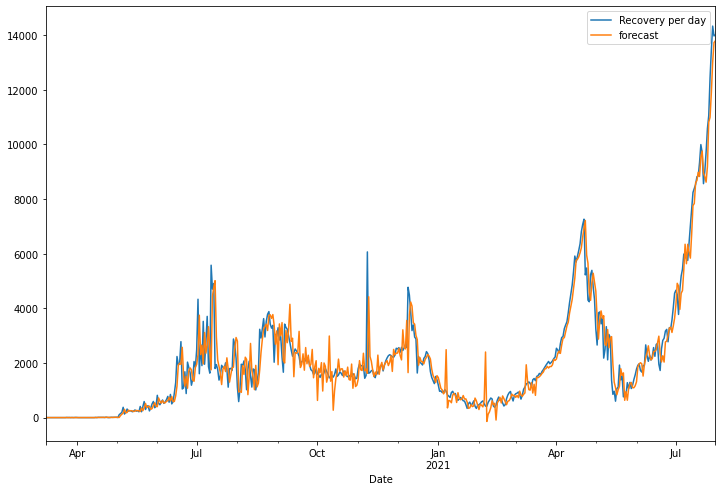

In [ ]:
df_recovery1['forecast'] = results_recovery_sm.predict(start=0, end=511)
df_recovery1[['Recovery per day','forecast']].plot(figsize=(12,8))

In [ ]:
# Calculate mean squared error (MSE)
MSE = metrics.mean_squared_error(df_recovery1["Recovery per day"],df_recovery1["forecast"])
print('Mean Squared Error (MSE): ' + str(MSE))

# Calculate root mean squared error (RMSE)
RMSE = rmse(df_recovery1["Recovery per day"],df_recovery1["forecast"])
print('Root Mean Squared Error (RMSE): ' + str(RMSE))

# Calculate Mean Absolute Error (MAE)
MAE = metrics.mean_absolute_error(df_recovery1["Recovery per day"],df_recovery1["forecast"])
print('Mean Absolute Error (MAE): ' + str(MAE))

# Calculate Mean Absolute Percentage Error (MAPE)
MAPE = np.mean(np.abs(np.subtract(df_recovery1["Recovery per day"],df_recovery1["forecast"])/df_recovery1["Recovery per day"]))
print('Mean Absolute Percentage Error (MAPE): ' + str(MAPE) + ' %')

# Calculate Median Absolute Percentage Error (MDAPE)
MDAPE = np.median(np.abs(np.subtract(df_recovery1["Recovery per day"],df_recovery1["forecast"])/df_recovery1["Recovery per day"]))
print('Median Absolute Percentage Error (MDAPE): ' + str(MDAPE) + ' %')

Mean Squared Error (MSE): 383317.2620879792
Root Mean Squared Error (RMSE): 619.1262085293912
Mean Absolute Error (MAE): 365.49864219261366
Mean Absolute Percentage Error (MAPE): inf %
Median Absolute Percentage Error (MDAPE): nan %


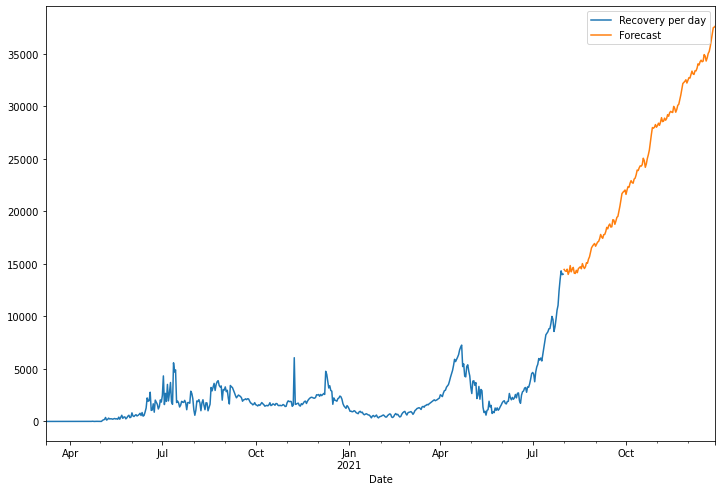

In [ ]:
# Forecast for the next 5 months using SARIMAX
from pandas.tseries.offsets import DateOffset
forecast1 = results_recovery_sm.predict(start = len(df_recovery1),  
                          end = (len(df_recovery1)-1) + 150).rename('Forecast') 
  
# Plot the forecast values 
df_recovery1['Recovery per day'].plot(figsize = (12, 8), legend = True) 
forecast1.plot(legend = True) 

In [ ]:
forecast1.head(30)

2021-08-01    14470.483277
2021-08-02    14330.402598
2021-08-03    14286.394210
2021-08-04    14493.479807
2021-08-05    13995.889834
2021-08-06    14266.913590
2021-08-07    14837.725118
2021-08-08    14240.986597
2021-08-09    14491.292164
2021-08-10    14664.988350
2021-08-11    14109.658817
2021-08-12    14088.233853
2021-08-13    14388.961442
2021-08-14    14162.994046
2021-08-15    14537.244099
2021-08-16    14640.970031
2021-08-17    14724.805788
2021-08-18    14535.184843
2021-08-19    15025.256400
2021-08-20    14742.113540
2021-08-21    14554.637237
2021-08-22    14723.445767
2021-08-23    15102.226800
2021-08-24    15059.223581
2021-08-25    15447.240546
2021-08-26    15668.127320
2021-08-27    16076.051438
2021-08-28    16527.519033
2021-08-29    16691.525669
2021-08-30    16828.952747
Freq: D, Name: Forecast, dtype: float64